In [31]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df=pd.read_csv("C:/UserData/Kaustav/elabs_probation/genres_v2.csv")

C:\Users\KIIT\AppData\Local\Temp\ipykernel_29356\1911495373.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:/UserData/Kaustav/elabs_probation/genres_v2.csv")


In [33]:
print(df.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmR

In [34]:
print(df.dtypes)

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object


CLEANING DATA

1) DELETING ALL COULUMNS WITH O ENTRIES

In [35]:
df=df.drop(['Unnamed: 0','title'],axis=1)

In [36]:
tptnl['song_name'] = tptnl['song_name'].astype(str)

visulaization 1

energy and danceability

In [37]:
enrdnc=df.groupby('energy')['danceability'].sum()

<Axes: xlabel='energy'>

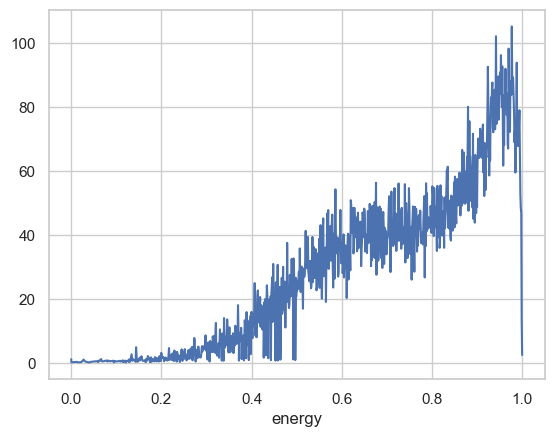

In [38]:
enrdnc.plot()

    VISUALIZATION 2

TOP 10 SONGS RANKED BY DANCEABILITY
    

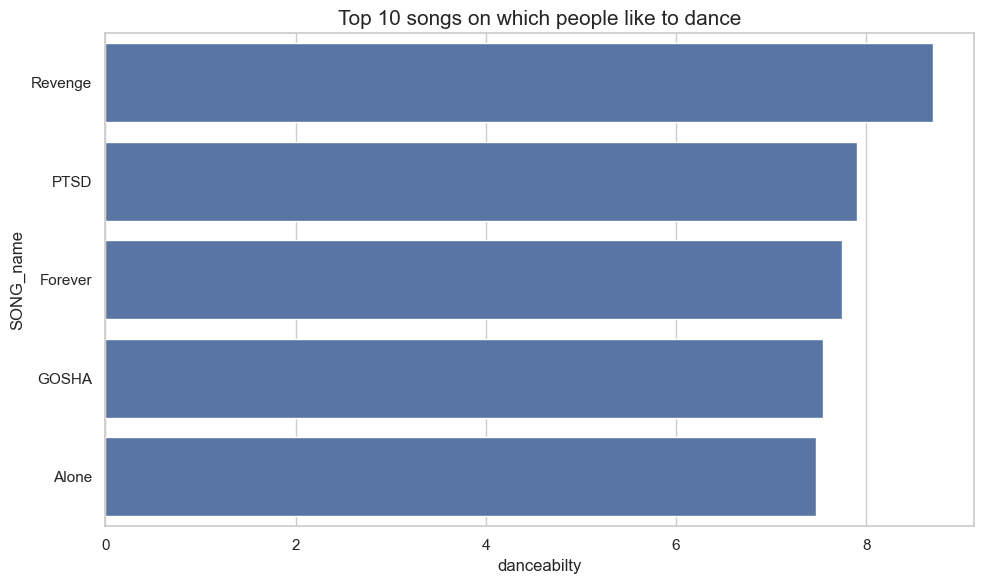

In [39]:
ttendance=df.groupby('song_name')['danceability'].sum().sort_values(ascending=False).head()
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.barplot(x=ttendance.values, y=ttendance.index)
plt.title("Top 10 songs on which people like to dance", fontsize=15)
plt.xlabel("danceabilty")
plt.ylabel("SONG_name")
plt.tight_layout()
plt.show()

VISUALIZATION 3

Acousticness vs top 10 songs.

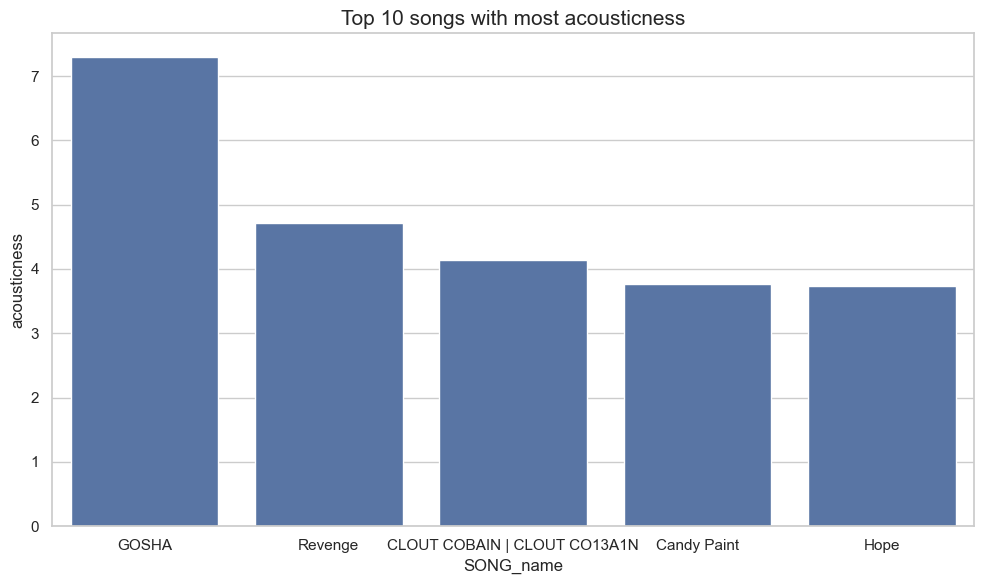

In [46]:
ascvtts=df.groupby('song_name')['acousticness'].sum().sort_values(ascending=False).head()
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.barplot(x=ascvtts.index, y=ascvtts.values)
plt.title("Top 10 songs with most acousticness", fontsize=15)
plt.ylabel("acousticness")
plt.xlabel("SONG_name")
plt.tight_layout()
plt.show()

VISUALIZATION 4

acousticness vs instrumentalness of top 5 accoustic songs

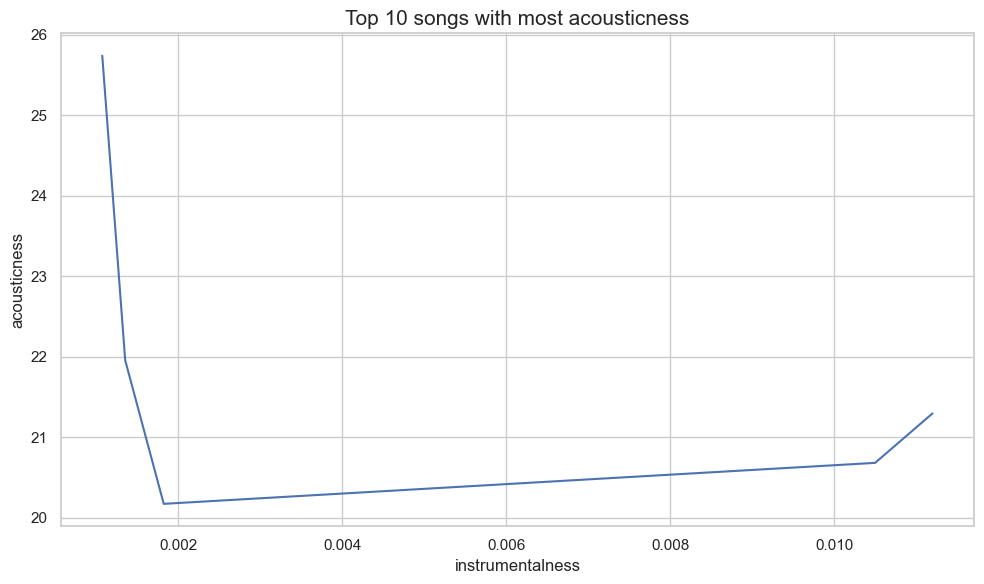

In [51]:
scnvinst=df.groupby('acousticness')['instrumentalness'].sum().sort_values(ascending=False).head(n=5
)
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.lineplot(x=scnvinst.index, y=scnvinst.values)
plt.title("Top 10 songs with most acousticness", fontsize=15)
plt.ylabel("acousticness")
plt.xlabel("instrumentalness")
plt.tight_layout()
plt.show()

VISUALIZATION 5

acousticness vs instrumentation of top 10 loud songs

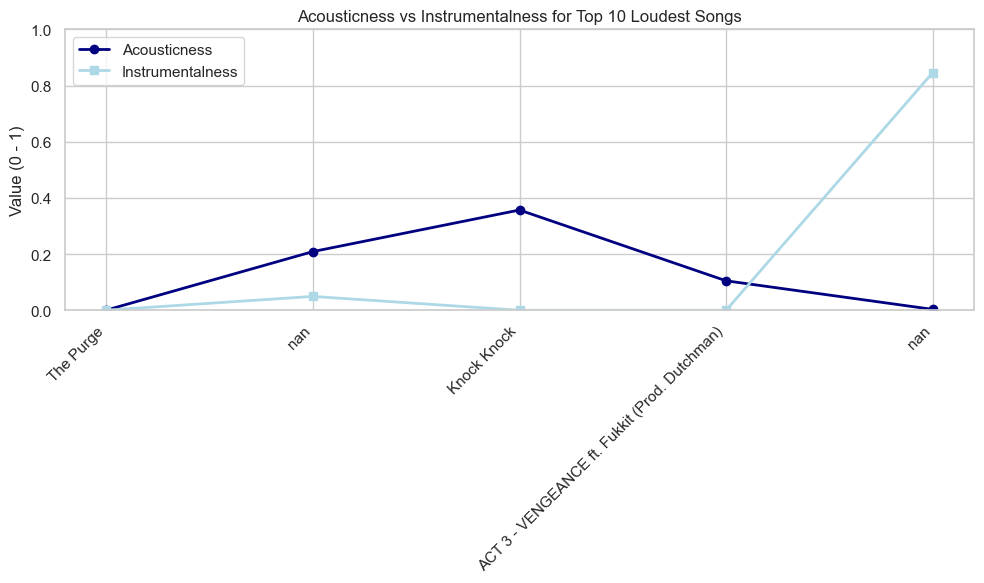

In [55]:
tptnl = df.nlargest(5, 'loudness')[['song_name','acousticness','instrumentalness','loudness']]
plt.figure(figsize=(10,6))
x = range(len(tptnl))
plt.plot(x, tptnl['acousticness'], marker='o', label='Acousticness', color='navy', linewidth=2)
plt.plot(x, tptnl['instrumentalness'], marker='s', label='Instrumentalness', color='lightblue', linewidth=2)
plt.title("Acousticness vs Instrumentalness for Top 10 Loudest Songs")
plt.ylabel("Value (0 - 1)")
plt.xticks(x, tptnl['song_name'], rotation=45, ha='right') 
plt.ylim(0,1)
plt.legend()


plt.tight_layout()
plt.show()